<a href="https://colab.research.google.com/github/stenoe/BDOA/blob/main/Notebooks/read_website_dataipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading data from websites

## Getting data from free available sources in the internet

**That is called web scraping.**

Here, I make again a simple example, using the NOAA Mauna Loa CO2 data.

The task is to:

1. find the data and copy the link
2. read the data in a simple way 
3. make some processing
4. visualise the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Reading csv via pandas

Pandas offers the `read_csv` method. It can read data directly from the website.
If that data is in the proper format (here `.csv`). 


In [2]:
url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv"
df = pd.read_csv(url, skiprows=56)

# create a copy for demo use!
df1 = df.copy()

df

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
775,2022,10,2022.7917,415.78,419.13,30,0.27,0.10
776,2022,11,2022.8750,417.51,419.51,25,0.52,0.20
777,2022,12,2022.9583,418.95,419.64,24,0.50,0.20
778,2023,1,2023.0417,419.47,419.14,31,0.40,0.14


## Create a datetime column for plotting a time series

The `pandas` method `to_datetime()` accepts only input where a year-moonth-day structure is given! Because we have monthly data we have to set a day! In this version I chose to use always the first day of the month!

In [3]:
# Create a datetime column
df["date"] = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df.year, df.month)])
df = df.set_index(df.date)
df = df[["average", "deseasonalized"]]
df

,average,deseasonalized
date,,
1958-03-01,315.70,314.43
1958-04-01,317.45,315.16
1958-05-01,317.51,314.71
1958-06-01,317.24,315.14
1958-07-01,315.86,315.18
...,...,...
2022-10-01,415.78,419.13
2022-11-01,417.51,419.51
2022-12-01,418.95,419.64


## Alternative way to create a datetime column

Instead of looping through all the year and month entries, it's possible to use the first and last entry only and generate a datetime range. In this case, the standard call to the method `date_range()` will choose the last day if the month!

**NOTE:** This only works if there are no missing data inbetween! You need to check if all data are actually there.

In [4]:
pd.date_range(f"{int(df1.iloc[0].year)}-{int(df1.iloc[0].month)}", f"{int(df1.iloc[-1].year)}-{int(df1.iloc[-1].month)}", freq="M")


DatetimeIndex(['1958-03-31', '1958-04-30', '1958-05-31', '1958-06-30',
               '1958-07-31', '1958-08-31', '1958-09-30', '1958-10-31',
               '1958-11-30', '1958-12-31',
               ...
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31'],
              dtype='datetime64[ns]', length=779, freq='M')

## Visualise the data

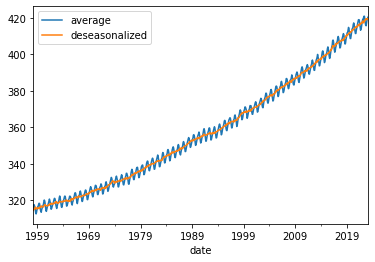

In [5]:
df.plot();

## Reading from web via url request and decoding

In [6]:
import requests
import io

fn = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt"

data = requests.get(fn).content

In [7]:
header = ["year", "month", "decimal date",	"average",	"deseasonalized",	"ndays",	"sdev",	"unc"]

df2 = pd.read_csv(io.StringIO(data.decode("utf-8")), skiprows=58, sep = "\s+", header=None, engine="python")
df2.columns = header
df2

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
775,2022,10,2022.7917,415.78,419.13,30,0.27,0.10
776,2022,11,2022.8750,417.51,419.51,25,0.52,0.20
777,2022,12,2022.9583,418.95,419.64,24,0.50,0.20
778,2023,1,2023.0417,419.47,419.14,31,0.40,0.14


In [8]:
# Create a datetime column
df2["date"] = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df2.year, df2.month)])
df2 = df2.set_index(df2.date)
df2 = df2[["average", "deseasonalized"]]
df2

,average,deseasonalized
date,,
1958-03-01,315.70,314.43
1958-04-01,317.45,315.16
1958-05-01,317.51,314.71
1958-06-01,317.24,315.14
1958-07-01,315.86,315.18
...,...,...
2022-10-01,415.78,419.13
2022-11-01,417.51,419.51
2022-12-01,418.95,419.64


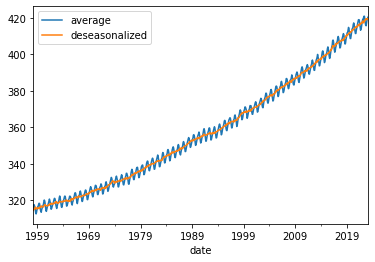

In [9]:
df2.plot();